In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv')
print(f"Train: {df_train.shape}")
df_test = pd.read_csv('test.csv')
print(f"Test: {df_test.shape}")

df_train.head()

Train: (3116945, 22)
Test: (2077964, 21)


,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [3]:
df_train.isnull().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

## Handling Missing Values

We drop rows for columns with few missing values and fill in missing values with the string "missing" for columns with many missing values.

In [4]:
# Get columns with less than 60 missing values
cols_few_missing = df_train.columns[(df_train.isnull().sum() > 0) & (df_train.isnull().sum() < 60)]

df_train_new = df_train.dropna(subset=cols_few_missing)

In [5]:
df_train_new.isnull().sum()

id                            0
class                         0
cap-diameter                  0
cap-shape                     0
cap-surface              670948
cap-color                     0
does-bruise-or-bleed          0
gill-attachment          523876
gill-spacing            1258317
gill-color                    0
stem-height                   0
stem-width                    0
stem-root               2756822
stem-surface            1980676
stem-color                    0
veil-type               2957273
veil-color              2740741
has-ring                      0
ring-type                128850
spore-print-color       2849483
habitat                       0
season                        0
dtype: int64

In [6]:
# Get columns with many missing values
cols_many_missing = df_train_new.columns[df_train_new.isnull().sum() > 0]

# Fill in rows where these columns have missing values
df_train_new_filled = df_train_new.copy()
df_train_new_filled[cols_many_missing] = df_train_new_filled[cols_many_missing].fillna("missing")
df_train_new_filled.isnull().sum()

id                      0
class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64

In [16]:
df_train_new_filled.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,missing,missing,w,missing,missing,f,f,missing,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,missing,y,o,missing,missing,t,z,missing,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,missing,s,n,missing,missing,f,f,missing,l,w
3,3,e,3.88,f,y,g,f,s,missing,g,...,missing,missing,w,missing,missing,f,f,missing,d,u
4,4,e,5.85,x,l,w,f,d,missing,w,...,missing,missing,w,missing,missing,f,f,missing,g,a


## Value Counts Analysis

The following function prints the value counts and the percentage of each value for every column.

In [9]:
def calculate_value_counts(df_calculate):
    for column in df_calculate.columns:
        print(f"\nValue counts and percentages for {column}:")
        value_counts = df_calculate[column].value_counts()
        percentages = df_calculate[column].value_counts(normalize=True) * 100
        
        # Combine counts and percentages into a DataFrame for nice display
        stats = pd.DataFrame({
            'Count': value_counts,
            'Percentage': percentages.round(2)
        })
        print(stats)
        print("-" * 50)

In [17]:
calculate_value_counts(df_train_new_filled.iloc[:, 1:])


Value counts and percentages for class:
         Count  Percentage
class                     
p      1705278       54.71
e      1411439       45.29
--------------------------------------------------

Value counts and percentages for cap-diameter:
              Count  Percentage
cap-diameter                   
1.49           8163        0.26
3.18           7942        0.25
3.14           7361        0.24
1.51           7072        0.23
4.04           6827        0.22
...             ...         ...
55.71             1        0.00
47.57             1        0.00
57.42             1        0.00
53.54             1        0.00
46.39             1        0.00

[3913 rows x 2 columns]
--------------------------------------------------

Value counts and percentages for cap-shape:
             Count  Percentage
cap-shape                     
x          1435940       46.07
f           676196       21.70
s           365127       11.72
b           318628       10.22
o           108829        3.4

## Filtering Rare Categories

We remove rows that contain rare values (occurring less than 200 times) for each column (excluding 'id' and 'class').

In [18]:
# Get value counts for each column except 'id' and 'class'
columns_to_check = [col for col in df_train_new_filled.columns if (col != 'id' and col != 'class')]

df_train_new_filled_filtered = df_train_new_filled.copy()

for column in columns_to_check:
    value_counts_train = df_train_new_filled[column].value_counts()
    
    # Get values that appear less than 200 times
    rare_values_train = value_counts_train[value_counts_train < 200].index
    
    if len(rare_values_train) > 0:
        print(f"\nRemoving rare values from {column}:")
        print(rare_values_train.tolist())
        
        # Create a mask and filter the DataFrame
        mask_train = ~df_train_new_filled_filtered[column].isin(rare_values_train)
        df_train_new_filled_filtered = df_train_new_filled_filtered[mask_train]

print(f"\nRows remaining: {len(df_train_new_filled_filtered)}")


Removing rare values from cap-diameter:
[13.54, 15.04, 12.84, 15.07, 12.82, 16.6, 14.68, 17.08, 13.67, 15.99, 0.5, 17.37, 14.98, 14.22, 18.76, 16.02, 17.95, 13.28, 14.88, 14.78, 15.09, 19.51, 17.69, 13.09, 14.12, 11.72, 17.16, 12.9, 16.92, 18.74, 17.49, 18.07, 12.97, 18.58, 14.3, 16.84, 15.28, 16.18, 16.67, 17.8, 16.91, 19.95, 19.61, 15.69, 52.3, 17.51, 19.26, 12.85, 16.45, 17.21, 18.91, 19.64, 15.72, 12.5, 12.94, 21.29, 17.02, 18.98, 18.79, 15.77, 16.05, 17.84, 13.47, 17.3, 13.6, 17.42, 18.51, 18.59, 15.88, 13.5, 12.76, 13.62, 16.74, 16.29, 16.97, 18.26, 15.96, 19.74, 12.71, 10.71, 16.56, 17.48, 18.69, 17.86, 14.04, 17.34, 19.68, 18.39, 17.22, 17.9, 16.65, 13.52, 18.65, 0.52, 17.29, 18.71, 12.55, 16.24, 14.11, 19.37, 18.29, 10.63, 14.6, 16.03, 14.72, 17.61, 17.91, 22.32, 17.85, 17.38, 18.14, 14.03, 15.68, 13.34, 18.95, 13.78, 19.19, 19.53, 17.64, 13.68, 15.94, 17.2, 17.76, 18.85, 19.99, 18.8, 15.01, 18.19, 18.96, 16.68, 15.93, 17.58, 10.81, 18.38, 16.46, 19.46, 16.58, 16.72, 16.35, 2

In [19]:
calculate_value_counts(df_train_new_filled_filtered.iloc[:, 1:])


Value counts and percentages for class:
         Count  Percentage
class                     
p      1584398       54.45
e      1325462       45.55
--------------------------------------------------

Value counts and percentages for cap-diameter:
              Count  Percentage
cap-diameter                   
1.49           8034        0.28
3.18           7901        0.27
3.14           7350        0.25
1.51           6970        0.24
3.28           6797        0.23
...             ...         ...
19.32            95        0.00
17.59            92        0.00
17.60            89        0.00
17.98            88        0.00
17.89            74        0.00

[1497 rows x 2 columns]
--------------------------------------------------

Value counts and percentages for cap-shape:
             Count  Percentage
cap-shape                     
x          1358141       46.67
f           626370       21.53
s           344780       11.85
b           309256       10.63
c           102568        3.5

In [20]:
df_train_new_filled_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2909860 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory usag

## Feature Engineering and Encoding

We separate the target variable and perform one-hot encoding for the categorical features.

In [21]:
Y = df_train_new_filled_filtered['class']
df_train_new_filled_filtered = df_train_new_filled_filtered.drop(['class'], axis=1)

# Get numerical and categorical columns
numerical_cols = df_train_new_filled_filtered.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_train_new_filled_filtered.select_dtypes(include=['object']).columns

encoded_columns_train = pd.get_dummies(df_train_new_filled_filtered[categorical_cols], prefix=categorical_cols)

# Combine numerical columns with encoded categorical columns
df_train_encoded = pd.concat([df_train_new_filled_filtered[numerical_cols], encoded_columns_train], axis=1)
df_train_encoded.head()


,id,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,0,8.80,4.51,15.39,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1,4.51,4.79,6.48,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,2,6.94,6.85,9.93,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,3,3.88,4.16,6.53,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,4,5.85,3.37,8.36,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), int64(1), object(17)
memory usage: 332.9+ MB


## Preprocessing the Test Data

We apply similar missing value treatments and encoding to the test dataset. Note that the test set does not contain the target variable.

In [23]:
df_test_new_filled = df_test.copy()

# Get numerical and categorical columns
numerical_cols_test = df_test_new_filled.select_dtypes(include=['int64', 'float64'])
categorical_cols_test = df_test_new_filled.select_dtypes(include=['object'])

for num_col in numerical_cols_test:
    df_test_new_filled[num_col] = df_test_new_filled[num_col].fillna(value=df_test_new_filled[num_col].mean())

for cat_col in categorical_cols_test:
    df_test_new_filled[cat_col] = df_test_new_filled[cat_col].fillna("missing")

df_test_new_filled.isnull().sum()

id                      0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64

In [24]:
encoded_columns_test = pd.get_dummies(df_test_new_filled[categorical_cols_test.columns], prefix=categorical_cols_test.columns)

# Get the columns that are in test but not in train
columns_to_drop = [col for col in encoded_columns_test.columns if col not in encoded_columns_train.columns]

# Drop these columns from the test set
encoded_columns_test = encoded_columns_test.drop(columns=columns_to_drop)

# Add any missing columns from train that aren't in test (with all False values)
missing_cols = [col for col in encoded_columns_train.columns if col not in encoded_columns_test.columns]
for col in missing_cols:
    encoded_columns_test[col] = False

# Ensure columns are in the same order as train
encoded_columns_test = encoded_columns_test[encoded_columns_train.columns]

# Recombine with numerical columns
df_test_encoded = pd.concat([df_test_new_filled[numerical_cols], encoded_columns_test], axis=1)

df_test_encoded.head()

,id,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,3116945,8.64,11.13,17.12,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,3116946,6.90,1.27,10.75,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,3116947,2.00,6.18,3.14,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,3116948,3.47,4.98,8.51,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,3116949,6.17,6.73,13.70,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


## Splitting the Data into Training and Validation Sets

We split the training data into a training set and a validation set, ensuring that the class distribution is maintained (stratification).

In [25]:
SEED = 75

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_train_encoded.drop(['id'], axis=1), 
    Y,
    test_size=0.2,
    random_state=SEED,
    stratify=Y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (2327888, 128)
Testing set shape: (581972, 128)


## Feature Scaling

We use StandardScaler to standardize the features.

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training and Evaluation Function

This function trains a classifier and evaluates its accuracy on the validation set.

In [76]:
def train_model(classifier, y_train=y_train, y_test=y_test):
    classifier.fit(X_train_scaled, y_train)
    y_pred = classifier.predict(X_test_scaled)
    y_pred_proba = classifier.predict_proba(X_test_scaled)[:, 1]
    
    return y_pred, y_pred_proba

In [77]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

def evaluate_model(y_test, y_pred, y_pred_proba):    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    print(f"\nAUC-ROC Score: {auc_roc:.4f}")

    # Generate ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_roc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

In [62]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

## Logistic Regression Model

We train and evaluate a Logistic Regression model.

In [78]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(max_iter=5000, random_state=SEED)
y_pred_lg, y_pred_proba_lg = train_model(lg, y_train_encoded, y_test_encoded)

Accuracy: 0.8693
F1 Score: 0.8694

Confusion Matrix:
[[228521  36571]
 [ 39493 277387]]

AUC-ROC Score: 0.9364


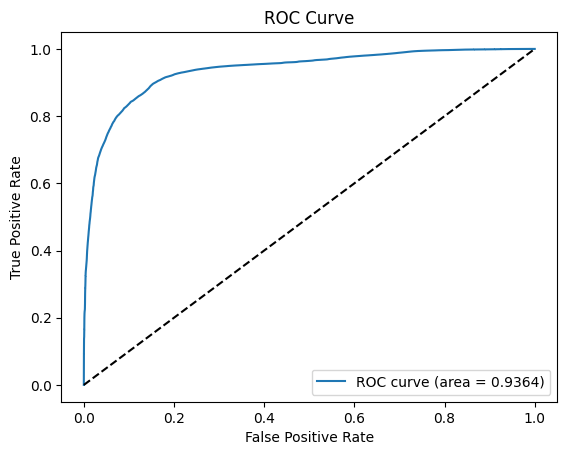

In [79]:
evaluate_model(y_test_encoded, y_pred_lg, y_pred_proba_lg)

## Random Forest Classifier

We train and evaluate a Random Forest model with specified hyperparameters.

In [80]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=500,          # More trees for better performance
    max_depth=20,              # Control tree depth to prevent overfitting
    min_samples_split=5,       # Minimum samples required to split a node
    min_samples_leaf=2,        # Minimum samples required at each leaf node
    max_features='sqrt',       # Number of features to consider at each split
    class_weight='balanced',   # Handle any class imbalance
    random_state=SEED
)

y_pred_rf, y_pred_proba_rf = train_model(rf, y_train_encoded, y_test_encoded)

Accuracy: 0.9918
F1 Score: 0.9918

Confusion Matrix:
[[263332   1760]
 [  3010 313870]]

AUC-ROC Score: 0.9966


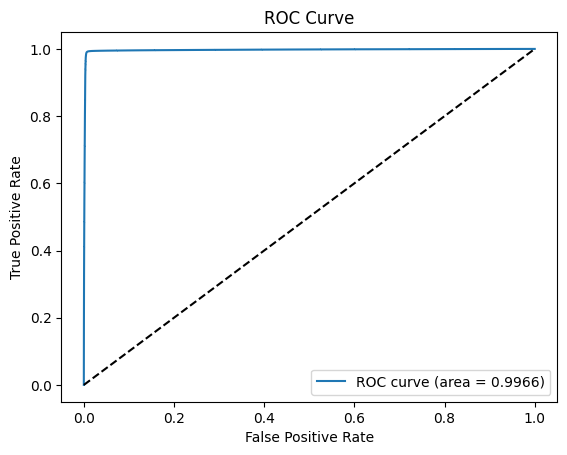

In [81]:
evaluate_model(y_test_encoded, y_pred_rf, y_pred_proba_rf)

## XGBoost Classifier

We also train and evaluate an XGBoost classifier. Note that the target variable is encoded for XGBoost.

In [82]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold

N_SPLITS = 5

xgb = XGBClassifier(
    n_estimators=500,
    max_depth=20,
    learning_rate=0.1,
    objective='binary:logistic',
    random_state=SEED,
    eval_metric='logloss'
)

kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)
cv_scores = cross_val_score(xgb, X_train_scaled, y_train_encoded, cv=kf, scoring='accuracy')

print("\nCross-validation scores:", cv_scores)
print(f"Mean Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

y_pred_xgb, y_pred_proba_xgb = train_model(xgb, y_train_encoded, y_test_encoded)


Cross-validation scores: [0.99229989 0.99248246 0.9921431  0.99216027 0.99219893]
Mean Accuracy: 0.9923 ± 0.0001


Accuracy: 0.9923
F1 Score: 0.9923

Confusion Matrix:
[[263181   1911]
 [  2570 314310]]

AUC-ROC Score: 0.9967


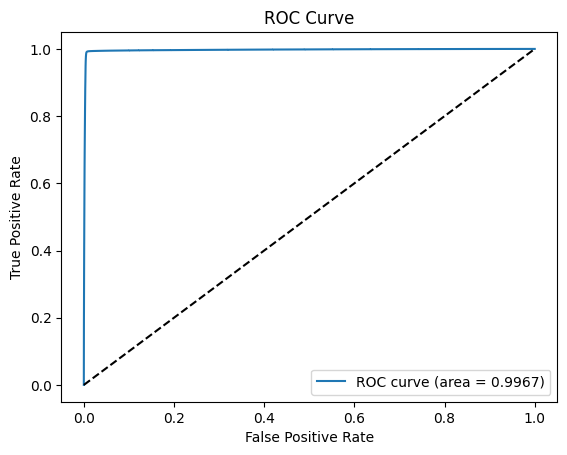

In [83]:
evaluate_model(y_test_encoded, y_pred_xgb, y_pred_proba_xgb)

In [84]:
X_pred_scaled = scaler.transform(df_test_encoded.drop(['id'], axis=1))

y_new_pred = xgb.predict(X_pred_scaled)
y_new_pred_decoded = encoder.inverse_transform(y_new_pred)

df_predictions = pd.DataFrame({
    'id': df_test_encoded['id'],
    'class': y_new_pred_decoded
})

csv_filename = "predictions_xgb.csv"
df_predictions.to_csv(csv_filename, index=False)